## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?

  Regression predicts continuous value and classification predicts categorical labels
2. What is a confusion table? What does it help us understand about a model's performance?

  A table that compares predicted vs. actual classes in classification tasks. It shows things like true positives and false positives, which helps us evaluate model accuracy.
3. What does the SSE quantify about a particular model?

  The Sum of Squared Errors measures how far predictions are from actual values in regression. A lower SSE means there's a better fit.
4. What are overfitting and underfitting?

  An overfitting model memorizes noise in the training data. An underfitting model is too simple and misses key patterns.
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

  It prevents overfitting and helps evaluate how well a model performs on data it hasn’t seen before. Picking k based on test error helps balance bias and variance.
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

  Reporting a class label is simple and easy to understand. It gives a clear prediction and is useful when a definite decision is needed. However, it doesn’t show how confident the model is in its prediction. On the other hand, a probability distribution shows the likelihood of each possible class. This provides more information, but it can be harder to interpret and may not be necessary if only the final choice matters.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [ ]:
#Question 1
df = pd.read_csv("USA_cars_datasets.csv")
df = df[['mileage', 'price', 'year']].dropna()
df.head(10)

,mileage,price,year
0,274117,6300,2008
1,190552,2899,2011
2,39590,5350,2018
3,64146,25000,2014
4,6654,27700,2018
5,45561,5700,2018
6,149050,7300,2010
7,23525,13350,2017
8,9371,14600,2018
9,63418,5250,2017


In [ ]:
#Question 2

#Define maxmin
def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

df[['year', 'mileage']] = df[['year', 'mileage']].apply(maxmin)

y = df['price']
X = df[['year', 'mileage']]

df.head(10)

,mileage,price,year
0,0.269287,6300,0.744681
1,0.187194,2899,0.808511
2,0.038892,5350,0.957447
3,0.063016,25000,0.872340
4,0.006537,27700,0.957447
5,0.044758,5700,0.957447
6,0.146424,7300,0.787234
7,0.023110,13350,0.936170
8,0.009206,14600,0.957447
9,0.062301,5250,0.936170


In [ ]:
#Question 3

# Step 6: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)


k = 3, SSE = 66743996748.22


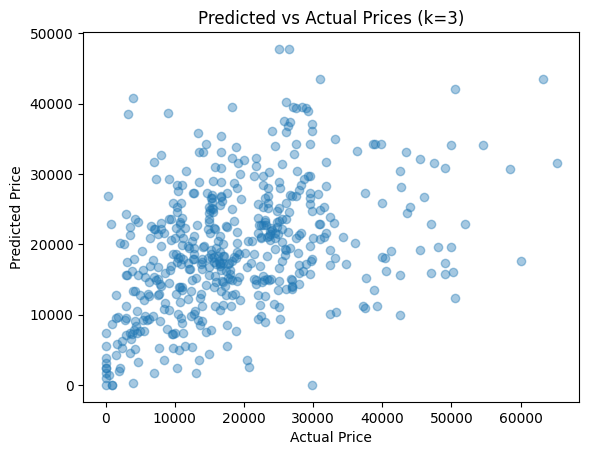

k = 10, SSE = 55794351309.37


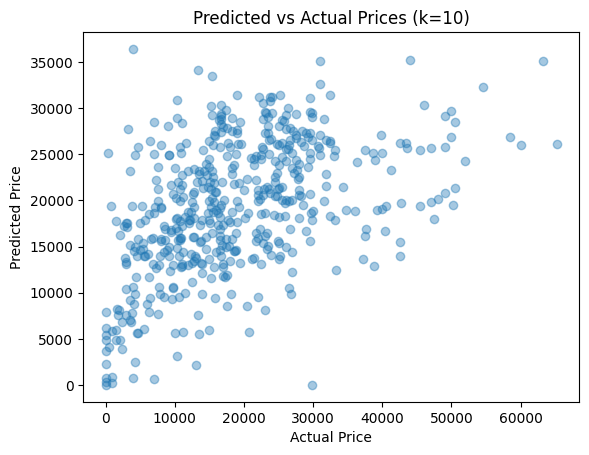

k = 25, SSE = 52481392435.06


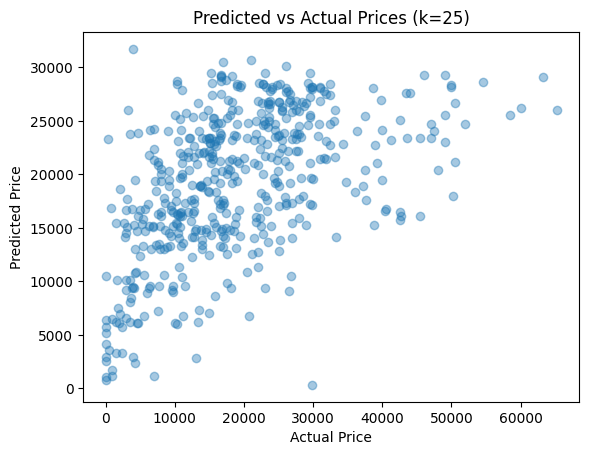

k = 50, SSE = 51936596609.98


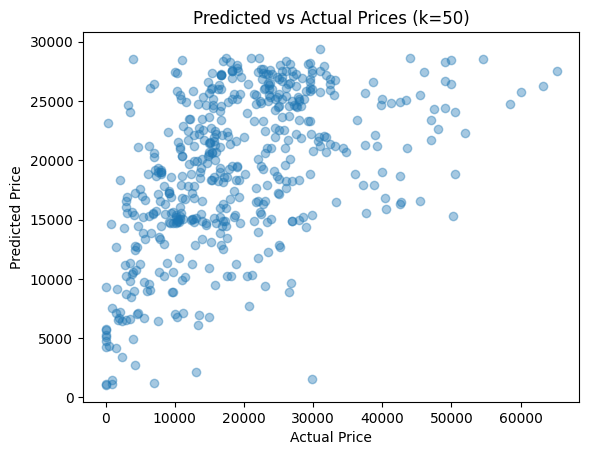

k = 100, SSE = 52267499629.61


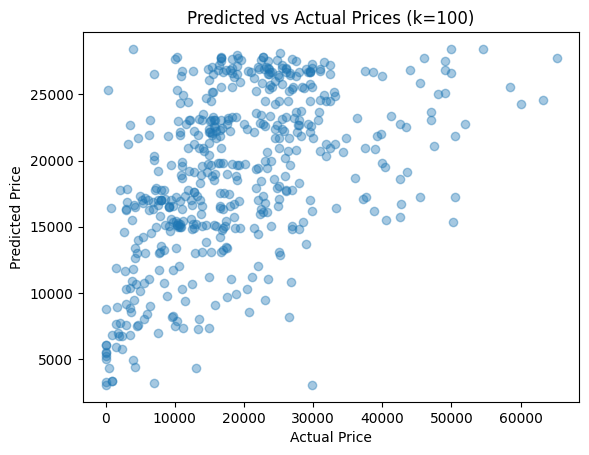

k = 300, SSE = 53828840368.12


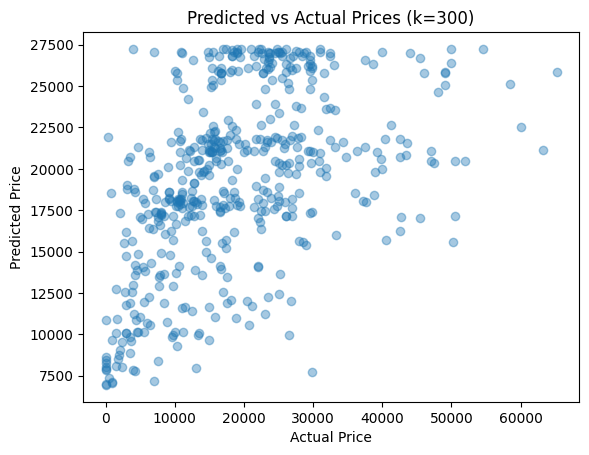

In [ ]:
#Question 4

SSE = []  # Store sum of squared errors for test set
k_values = [3, 10, 25, 50, 100, 300]  # Specific k values to test

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)  # Create KNN model with current k
    model.fit(X_train, y_train)  # Fit model on training data
    y_hat = model.predict(X_test)  # Predict prices on test data
    sse = np.sum((y_test - y_hat) ** 2)  # Compute sum of squared errors
    SSE.append(sse)  # Store the SSE for this k
    print(f"k = {k}, SSE = {sse:.2f}")  # Print result
    plt.scatter(y_test, y_hat, alpha=0.4)
    plt.title(f'Predicted vs Actual Prices (k={k})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()

As k increases, the model pays less attention to individual data points and more to the overall trend. Small k values (like 3 or 10) tend to overfit, while large values (like 100 or 300) underfit by averaging too broadly.

**Question 5**

The optimal k for these data is 50, because it resulted in the lowest Sum of Squared Error (SSE) compared to the other values tested. This suggests that k = 50 provides the best balance between bias and variance for predicting price using year and mileage.

**Question 6**

As k increased, the predicted vs. actual price plots showed a shift from overfitting to underfitting. With small k values like 3, the model closely followed individual data points, which led to overfitting. As k grew larger, predictions became smoother and less responsive to variation in the data. At very high values like 300, the model became underfit and began to miss important patterns. Around k = 50, the plot showed a more balanced relationship, which captures the general trend without too much noise.